# Example Analysis of Steinmetz Dataset

This notebook demonstrates basic usage of all analysis tools and visualization functions. It serves as a quick-start guide for analyzing the Steinmetz dataset.

In [5]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_loader import SteinmetzDataLoader
from neural_analysis import NeuralAnalyzer
from behavior_analysis import BehaviorAnalyzer
from visualization import NeuralViz
from scipy import signal
# Set plotting style
#plt.style.use('seaborn')
sns.set_context("talk")

## 1. Data Loading and Basic Visualization

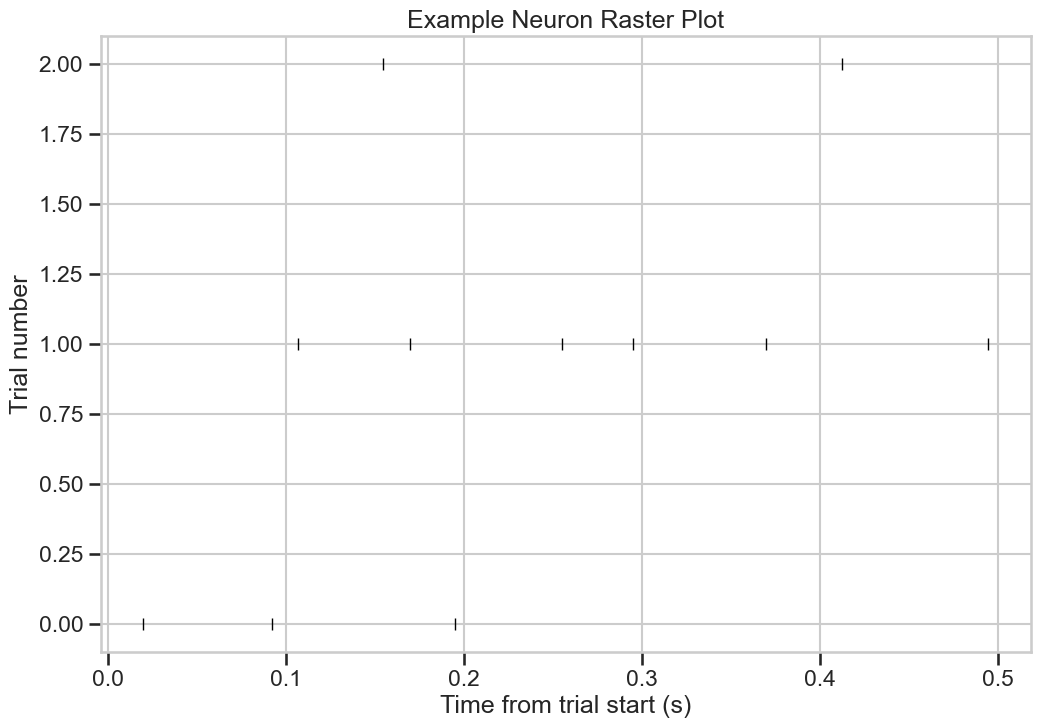

In [6]:
# Initialize components
loader = SteinmetzDataLoader()
analyzer = NeuralAnalyzer()
behavior_analyzer = BehaviorAnalyzer()
viz = NeuralViz()

# Load example session
session_data = loader.load_session(11)

# Create raster plot for first neuron
example_spikes = session_data['spikes'][0]
example_trials = np.arange(len(example_spikes))
viz.plot_raster(example_spikes[0], example_trials, (-0.5, 0.5), 
                title='Example Neuron Raster Plot')
plt.show()

## 2. Neural Activity Analysis

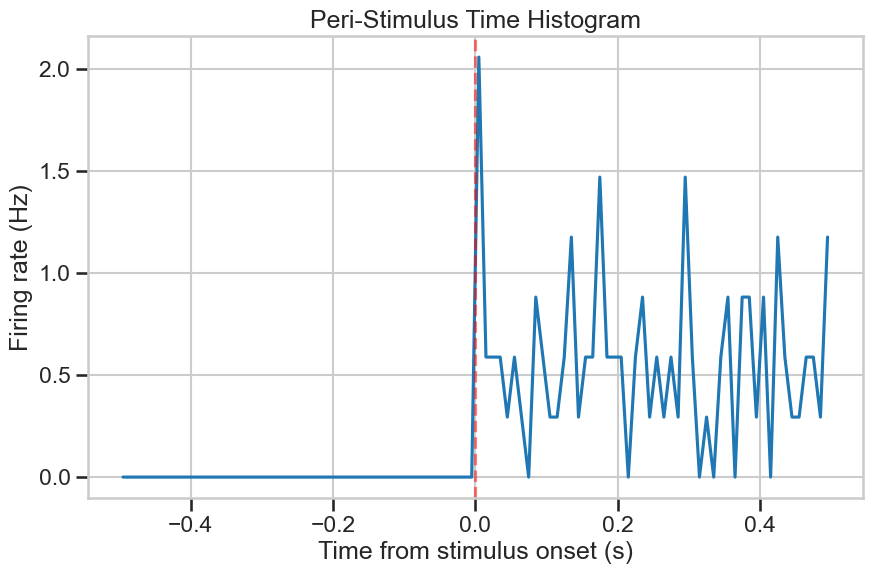

In [7]:
# Compute PSTH
psth, time_bins = analyzer.compute_psth(
    session_data['spikes'][0],
    time_window=(-0.5, 0.5)
)

# Plot PSTH
plt.figure(figsize=(10, 6))
plt.plot(time_bins, psth)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Time from stimulus onset (s)')
plt.ylabel('Firing rate (Hz)')
plt.title('Peri-Stimulus Time Histogram')
plt.show()

## 3. LFP Analysis Example

ValueError: x and y must have same first dimension, but have shapes (63,) and (12, 63)

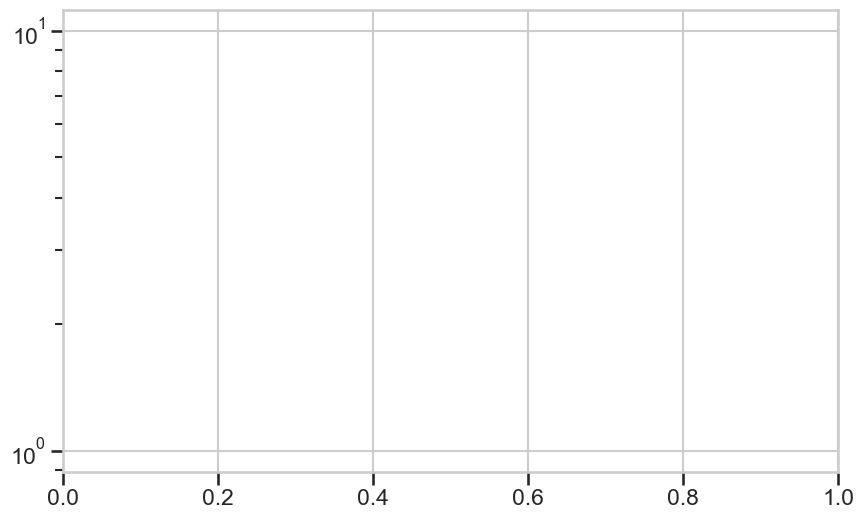

In [9]:
# Compute LFP power spectrum
freqs, power = analyzer.compute_lfp_power(
    session_data['lfp'][:, 0],  # First channel
    freq_range=(1, 100)
)

# Plot power spectrum
plt.figure(figsize=(10, 6))
plt.semilogy(freqs, power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('LFP Power Spectrum')
plt.grid(True)
plt.show()

## 4. Population Analysis Example

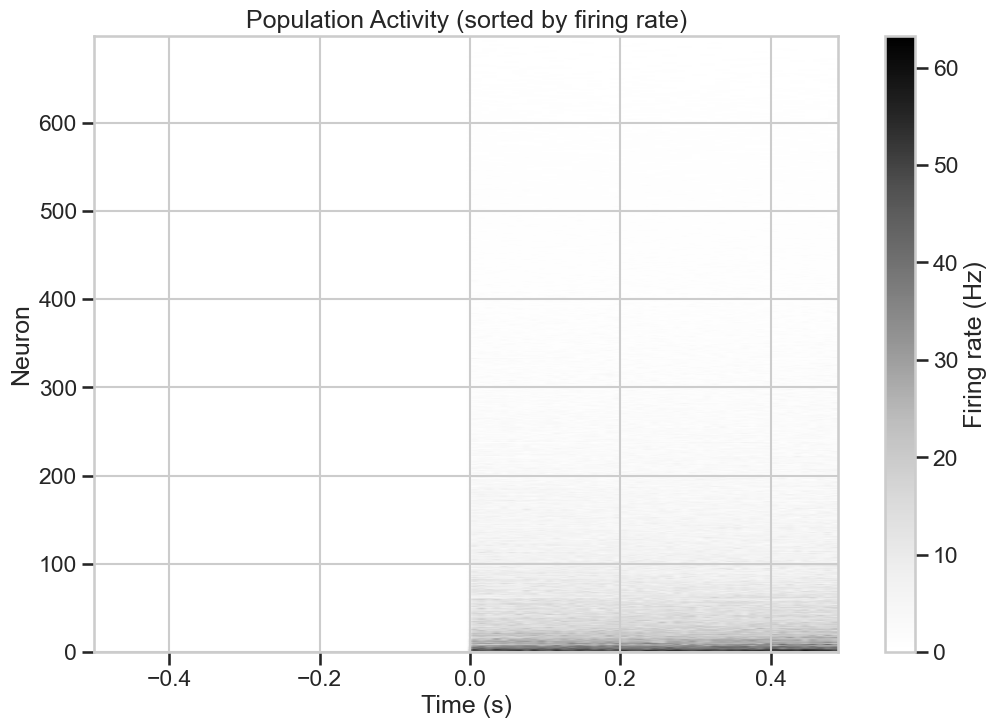

In [10]:
# Prepare population data
time_bins = np.arange(-0.5, 0.5, 0.01)
firing_rates = loader.compute_firing_rates(session_data['spikes'], time_bins)

# Create population activity heatmap
viz.plot_population_activity(firing_rates, time_bins, sort_by='rate')
plt.title('Population Activity (sorted by firing rate)')
plt.show()

## 5. Behavioral Analysis Example

In [11]:
# Generate example behavioral data
n_trials = len(session_data['spikes'][0])
example_choices = np.random.randint(0, 2, n_trials)
example_outcomes = np.random.randint(0, 2, n_trials)

# Analyze sequential effects
seq_effects = behavior_analyzer.compute_sequential_effects(
    example_choices, 
    example_outcomes
)

# Print results
print("Sequential Effects:")
for key, value in seq_effects.items():
    print(f"{key}: {value:.3f}")

Sequential Effects:
stay_after_reward: 0.503
switch_after_error: 0.525
total_reward_trials: 181.000
total_error_trials: 158.000


## 6. Cross-Regional Analysis Example

/Users/shibanibudhraja/Downloads/Neuromatch/venv/lib/python3.13/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


ValueError: x and y must have same first dimension, but have shapes (126,) and (12, 126)

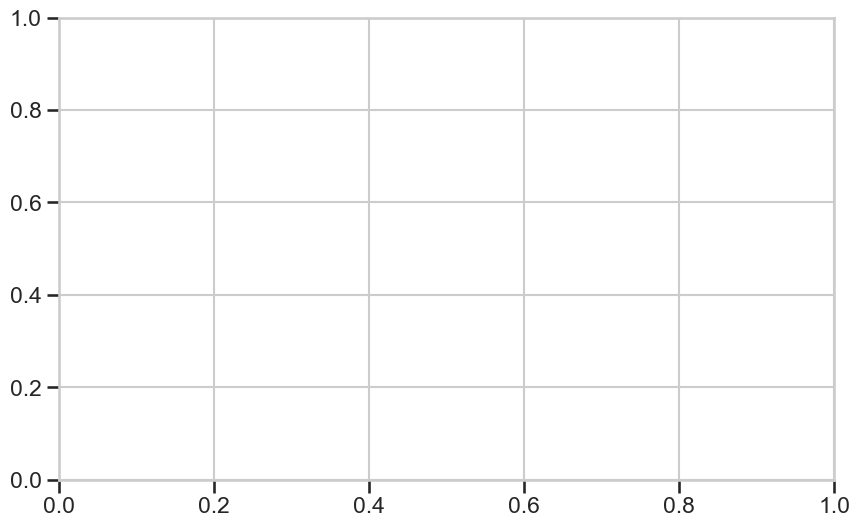

In [12]:
if 'session_data' in locals() and session_data is not None and session_data['lfp'].shape[1] >= 2:
    f, Cxy = signal.coherence(
        session_data['lfp'][:, 0],
        session_data['lfp'][:, 1],
        fs=100
    )

    # Plot coherence
    plt.figure(figsize=(10, 6))
    plt.plot(f, Cxy)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Coherence')
    plt.title('LFP Coherence between Two Channels')
    plt.grid(True)
    plt.show()
else:
    print("Not enough LFP channels for coherence analysis or session_data not loaded")

## 7. Interactive Visualization Example

In [13]:
# Create interactive time series plot of multiple LFP channels
time = np.arange(1000) / 100  # 10 seconds at 100 Hz
lfp_data = session_data['lfp'][:1000, :3]  # First 3 channels
channel_labels = [f'Channel {i+1}' for i in range(3)]

viz.create_interactive_timeseries(time, lfp_data, channel_labels)

IndexError: list index out of range

## 8. Summary Dashboard

In [14]:
# Add PSTH if available
if 'psth' in locals() and psth is not None:
    summary_data['PSTH'] = psth

# Add LFP Power if available
if 'power' in locals() and power is not None:
    summary_data['LFP Power'] = power

# Add firing rates if available
if 'firing_rates' in locals() and firing_rates is not None:
    # Take first 10 neurons or fewer if less are available
    summary_data['Population Activity'] = firing_rates[:min(10, firing_rates.shape[0])]

# Add coherence if available
if 'Cxy' in locals() and Cxy is not None:
    summary_data['LFP Coherence'] = Cxy

# Only create the plot if we have data
if summary_data:
    viz.create_summary_plot(summary_data, plot_type='dashboard')
    plt.suptitle('Analysis Summary Dashboard', y=1.02)
    plt.show()
else:
    print("No data available for summary dashboard - run the analysis cells first")

NameError: name 'summary_data' is not defined

In [5]:
# Create summary dashboard
summary_data = {
    'PSTH': psth,
    'LFP Power': power,
    'Population Activity': firing_rates[:10],  # First 10 neurons
    'LFP Coherence': Cxy
}

viz.create_summary_plot(summary_data, plot_type='dashboard')
plt.suptitle('Analysis Summary Dashboard', y=1.02)
plt.show()

NameError: name 'psth' is not defined